In [1]:
# import python libraries and packages
from textblob import TextBlob
import json
import matplotlib.pyplot as plt
%matplotlib inline  
from  matplotlib import style
import pandas as pd
import numpy as np
from itertools import *
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

#import all necessary packages for nltk, regex, and stopwords 
import nltk
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [2]:
df = pd.read_csv('beer_cluster3.csv')

In [3]:
df.shape

(63941, 21)

In [4]:
df.head()

,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,...,BoilTime,BoilGravity,Efficiency,MashThickness,BrewMethod,PitchRate,PrimaryTemp,M,cluster_num1,bu_gu
0,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45.0,21.77,1.055,1.013,5.48,17.65,4.83,...,75.0,1.038000,70,-1,All Grain,-1.0,17.78,1.0,3.0,0.321
1,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85.0,20.82,1.083,1.021,8.16,60.65,15.64,...,60.0,1.070000,70,-1,All Grain,-1.0,-99.00,1.0,2.0,0.731
2,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7.0,18.93,1.063,1.018,5.91,59.25,8.98,...,60.0,1.054778,70,-1,extract,-1.0,-99.00,0.0,6.0,0.940
3,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7.0,22.71,1.061,1.017,5.80,54.48,8.50,...,60.0,1.053315,70,-1,All Grain,-1.0,-99.00,0.0,6.0,0.893
4,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20.0,50.00,1.060,1.010,6.48,17.84,4.57,...,90.0,1.050000,72,-1,All Grain,-1.0,19.00,1.0,3.0,0.297


In [5]:
df.describe()

,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,PitchRate,PrimaryTemp,M,cluster_num1,bu_gu
count,63941.000000,63941.000000,63941.000000,63941.000000,63941.000000,63941.000000,63941.000000,63941.000000,63941.000000,63941.000000,63941.000000,63941.000000,63941.000000,63196.000000,60939.000000
mean,57.885373,36.859694,1.106740,1.472515,7.077995,42.161515,15.576312,44.545196,63.047954,3.424702,-0.484257,-13.165327,1.030963,3.082732,0.718392
std,62.819905,144.714137,0.451256,2.863365,6.450458,26.122925,32.229574,155.846715,17.958862,12.604394,9.569260,52.028214,0.480911,1.960272,0.348327
min,1.000000,1.000000,0.999000,0.994000,2.500000,1.560000,0.000000,1.007000,0.000000,-1.000000,-99.000000,-99.000000,0.000000,0.117000,0.077000
25%,10.000000,18.930000,1.050000,1.011000,5.110000,24.790000,5.490000,21.000000,60.000000,1.040000,-1.000000,-99.000000,1.000000,1.000000,0.457000
50%,30.000000,20.820000,1.057000,1.013000,5.840000,36.460000,9.200000,28.000000,60.000000,1.048000,0.350000,18.330000,1.000000,3.000000,0.660000
75%,108.000000,23.000000,1.067000,1.017000,6.910000,55.270000,19.690000,30.280000,60.000000,1.060000,0.750000,20.000000,1.000000,5.000000,0.916000
max,3996.000000,7476.190000,10.690000,72.170000,118.100000,1994.910000,4000.000000,9130.410000,240.000000,100.000000,95.000000,114.000000,6.000000,6.000000,3.729000


In [6]:
#dfbeer_text = df[['Name','URL','Style','cluster_num']]
dfbeer_text = df[['Name','cluster_num1']]

In [7]:
cluster1 = dfbeer_text[dfbeer_text.cluster_num1==1]
cluster1 = pd.DataFrame(cluster1)
cluster2 = dfbeer_text[dfbeer_text.cluster_num1==2]
cluster2 = pd.DataFrame(cluster2)
cluster3 = dfbeer_text[dfbeer_text.cluster_num1==3]
cluster3 = pd.DataFrame(cluster3)
cluster4 = dfbeer_text[dfbeer_text.cluster_num1==4]
cluster4 = pd.DataFrame(cluster4)
cluster5 = dfbeer_text[dfbeer_text.cluster_num1==5]
cluster5 = pd.DataFrame(cluster5)
cluster6 = dfbeer_text[dfbeer_text.cluster_num1==6]

In [8]:
cluster1.head()

,Name,cluster_num1
5,Sierra Nevada Pale Ale Clone,1.0
14,Pilsner Urquell BYO clone,1.0
31,Cascade Pale Ale,1.0
35,Vanilla Caramel Cream Ale,1.0
36,Coors Light Clone,1.0


In [9]:
dfbeer_text.head()

,Name,cluster_num1
0,Vanilla Cream Ale,3.0
1,Southern Tier Pumking clone,2.0
2,Zombie Dust Clone - EXTRACT,6.0
3,Zombie Dust Clone - ALL GRAIN,6.0
4,Bakke Brygg Belgisk Blonde 50 l,3.0


In [10]:
dfbeer_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63941 entries, 0 to 63940
Data columns (total 2 columns):
Name            63941 non-null object
cluster_num1    63196 non-null float64
dtypes: float64(1), object(1)
memory usage: 999.2+ KB


In [11]:
# create two dataframes and string objects
df_str = dfbeer_text.to_string()
df_str2 = df_str.lower()

In [12]:
#import other python packages and libraries to do wordclouds, wordcounts, and remove stopwords
from os import path
from scipy.misc import imread
import random
from wordcloud import WordCloud, STOPWORDS

In [13]:
#import other python packages and libraries to do wordclouds, wordcounts, and remove stopwords
import nltk
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

/Users/saultamariz/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


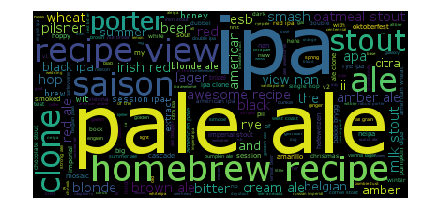

In [14]:
#create a wordclouds for string objects
dfbeer_wc = WordCloud(font_path='/Library/Fonts/Verdana.ttf',
                      relative_scaling = 0,
                      stopwords = {''} 
                      ).generate(df_str2)
plt.imshow(dfbeer_wc)
plt.axis("off")
plt.show() 

[('ale', 9323), ('ipa', 7684), ('pale', 3985), ('stout', 3724), ('clone', 2319), ('porter', 2042), ('red', 1927), ('saison', 1900), ('brown', 1588), ('the', 1571), ('wheat', 1467), ('american', 1408), ('belgian', 1316), ('blonde', 1150), ('recipe', 1071), ('amber', 1049), ('rye', 1026), ('lager', 1013), ('black', 1013), ('awesome', 998), ('imperial', 878), ('beer', 777), ('smash', 765), ('citra', 758), ('bitter', 722), ('irish', 720), ('session', 720), ('chocolate', 695), ('hop', 683), ('2', 668), ('cream', 663), ('oatmeal', 654), ('of', 650), ('apa', 646), ('honey', 642), ('summer', 616), ('pilsner', 600), ('dark', 568), ('english', 512), ('milk', 508), ('esb', 469), ('golden', 462), ('pumpkin', 432), ('a', 424), ('coffee', 422), ('wit', 417), ('double', 415), ('1', 405), ('hoppy', 404), ('and', 395)]
<FreqDist with 95423 samples and 244293 outcomes>


/Users/saultamariz/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


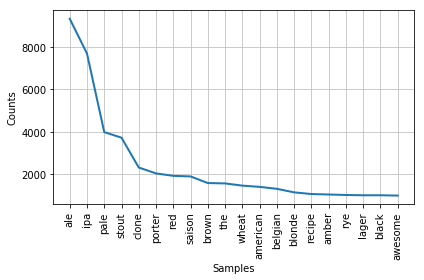

None


In [15]:
# dataframe for just reviews
df_new = df[['Name']]

# create two dataframes and string objects
df_new_str = df_new.to_string()
df_new_str2 = df_new_str.lower()
df_new_str3 = df_new_str2.replace('-','')
df_new_str4 = df_new_str3.split()

# frequency distribution
freq_words = nltk.FreqDist(df_new_str4)
print(freq_words.most_common(50))
print(freq_words)
print(freq_words.plot(20))

/Users/saultamariz/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


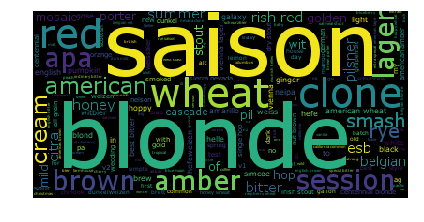

In [31]:
# create two dataframes and string objects
cluster1_str = cluster1.to_string()
cluster1_str2 = cluster1_str.lower()
#create a wordclouds for string objects
dfbeer_wc = WordCloud(font_path='/Library/Fonts/Verdana.ttf',
                      relative_scaling = 0,
                      stopwords = {'awesome','recipe','beer','the','and','ale','pale','ipa'} 
                      ).generate(cluster1_str2)
plt.imshow(dfbeer_wc)
plt.axis("off")
plt.show() 

/Users/saultamariz/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


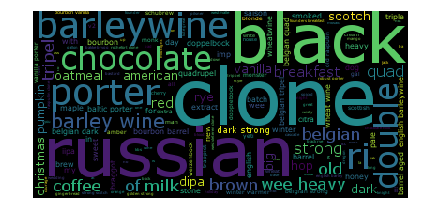

In [32]:
# create two dataframes and string objects
cluster2_str = cluster2.to_string()
cluster2_str2 = cluster2_str.lower()
#create a wordclouds for string objects
dfbeer_wc = WordCloud(font_path='/Library/Fonts/Verdana.ttf',
                      relative_scaling = 0,
                      stopwords = {'awesome','recipe','beer','the','and','stout','imperial','ale','ipa'} 
                      ).generate(cluster2_str2)
plt.imshow(dfbeer_wc)
plt.axis("off")
plt.show() 

/Users/saultamariz/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


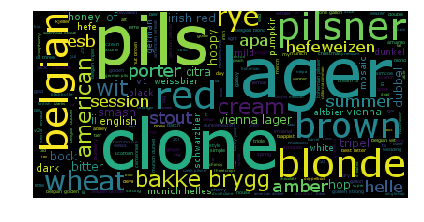

In [33]:
# create two dataframes and string objects
cluster3_str = cluster3.to_string()
cluster3_str2 = cluster3_str.lower()
#create a wordclouds for string objects
dfbeer_wc = WordCloud(font_path='/Library/Fonts/Verdana.ttf',
                      relative_scaling = 0,
                      stopwords = {'awesome','recipe','beer','the','and','ale','saison','pale','ipa'} 
                      ).generate(cluster3_str2)
plt.imshow(dfbeer_wc)
plt.axis("off")
plt.show() 

/Users/saultamariz/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


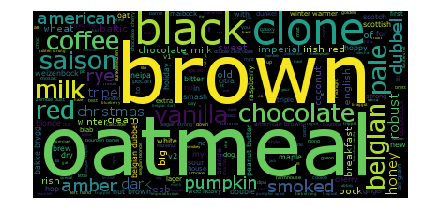

In [35]:
# create two dataframes and string objects
cluster4_str = cluster4.to_string()
cluster4_str2 = cluster4_str.lower()
#create a wordclouds for string objects
dfbeer_wc = WordCloud(font_path='/Library/Fonts/Verdana.ttf',
                      relative_scaling = 0,
                      stopwords = {'awesome','recipe','beer','the','and','stout','porter','ale','ipa'} 
                      ).generate(cluster4_str2)
plt.imshow(dfbeer_wc)
plt.axis("off")
plt.show()

/Users/saultamariz/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


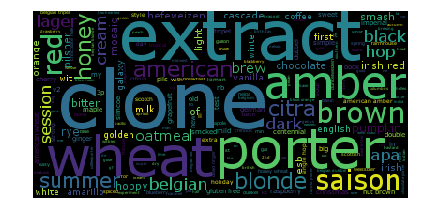

In [36]:
# create two dataframes and string objects
cluster5_str = cluster5.to_string()
cluster5_str2 = cluster5_str.lower()
#create a wordclouds for string objects
dfbeer_wc = WordCloud(font_path='/Library/Fonts/Verdana.ttf',
                      relative_scaling = 0,
                      stopwords = {'awesome','recipe','beer','the','and','ale','pale','ipa','stout'} 
                      ).generate(cluster5_str2)
plt.imshow(dfbeer_wc)
plt.axis("off")
plt.show()

/Users/saultamariz/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


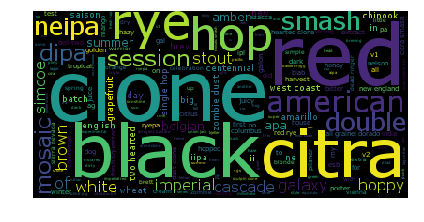

In [37]:
# create two dataframes and string objects
cluster6_str = cluster6.to_string()
cluster6_str2 = cluster6_str.lower()
#create a wordclouds for string objects
dfbeer_wc = WordCloud(font_path='/Library/Fonts/Verdana.ttf',
                      relative_scaling = 0,
                      stopwords = {'awesome','recipe','beer','the','and','ale','pale','ipa'} 
                      ).generate(cluster6_str2)
plt.imshow(dfbeer_wc)
plt.axis("off")
plt.show()

[('ale', 4507), ('pale', 2230), ('ipa', 1094), ('saison', 969), ('wheat', 907), ('red', 748), ('blonde', 734), ('american', 642), ('clone', 588), ('brown', 584), ('lager', 568), ('amber', 506), ('bitter', 487), ('session', 435), ('the', 435), ('apa', 411), ('beer', 399), ('smash', 388), ('cream', 373), ('recipe', 349), ('irish', 346), ('rye', 335), ('stout', 328), ('awesome', 328), ('belgian', 322), ('summer', 317), ('honey', 267), ('pilsner', 265), ('citra', 261), ('porter', 251), ('esb', 244), ('english', 244), ('wit', 230), ('2', 222), ('golden', 214), ('mild', 214), ('hop', 207), ('of', 191), ('vienna', 184), ('pils', 165), ('hefeweizen', 158), ('1', 156), ('hoppy', 152), ('cascade', 137), ('a', 135), ('mosaic', 134), ('common', 132), ('sour', 132), ('dark', 131), ('and', 130)]
<FreqDist with 34627 samples and 81231 outcomes>


/Users/saultamariz/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


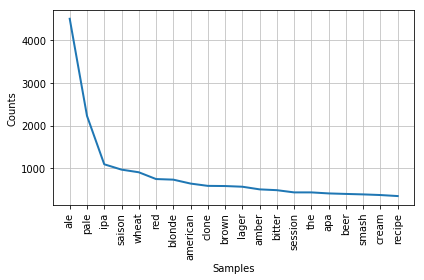

None


In [22]:
# dataframe for just reviews
cluster1_new = cluster1[['Name']]

# create two dataframes and string objects
cluster1_new_str = cluster1_new.to_string()
cluster1_new_str2 = cluster1_new_str.lower()
cluster1_new_str3 = cluster1_new_str2.replace('-','')
cluster1_new_str4 = cluster1_new_str3.split()

# frequency distribution
freq_words = nltk.FreqDist(cluster1_new_str4)
print(freq_words.most_common(50))
print(freq_words)
print(freq_words.plot(20))

[('stout', 833), ('imperial', 553), ('ale', 329), ('ipa', 267), ('clone', 231), ('the', 190), ('belgian', 173), ('porter', 162), ('barleywine', 150), ('russian', 135), ('black', 133), ('strong', 120), ('wine', 113), ('dark', 108), ('chocolate', 92), ('barley', 91), ('heavy', 89), ('wee', 88), ('ris', 83), ('double', 82), ('barrel', 80), ('old', 80), ('quad', 79), ('tripel', 75), ('recipe', 75), ('bourbon', 71), ('coffee', 69), ('milk', 69), ('breakfast', 69), ('brown', 68), ('awesome', 68), ('vanilla', 63), ('red', 59), ('of', 59), ('rye', 53), ('oatmeal', 48), ('big', 46), ('scotch', 46), ('english', 44), ('dipa', 43), ('christmas', 41), ('american', 40), ('12', 38), ('pumpkin', 38), ('winter', 37), ('a', 36), ('beer', 32), ('baltic', 32), ('wheat', 31), ('triple', 31)]
<FreqDist with 8721 samples and 17772 outcomes>


/Users/saultamariz/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


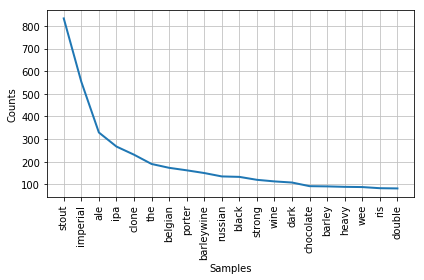

None


In [23]:
# dataframe for just reviews
cluster2_new = cluster2[['Name']]

# create two dataframes and string objects
cluster2_new_str = cluster2_new.to_string()
cluster2_new_str2 = cluster2_new_str.lower()
cluster2_new_str3 = cluster2_new_str2.replace('-','')
cluster2_new_str4 = cluster2_new_str3.split()

# frequency distribution
freq_words = nltk.FreqDist(cluster2_new_str4)
print(freq_words.most_common(50))
print(freq_words)
print(freq_words.plot(20))

[('ale', 962), ('saison', 446), ('pale', 431), ('ipa', 380), ('clone', 279), ('belgian', 276), ('lager', 266), ('pilsner', 224), ('red', 191), ('blonde', 172), ('pils', 159), ('the', 156), ('brown', 134), ('american', 132), ('wheat', 127), ('stout', 122), ('rye', 116), ('porter', 114), ('cream', 113), ('wit', 113), ('helles', 111), ('brygg', 106), ('bakke', 102), ('vienna', 98), ('amber', 92), ('l', 90), ('of', 86), ('golden', 80), ('german', 78), ('hefeweizen', 76), ('summer', 76), ('irish', 73), ('munich', 73), ('2', 72), ('tripel', 70), ('beer', 70), ('dubbel', 70), ('bitter', 66), ('recipe', 65), ('esb', 60), ('session', 60), ('awesome', 59), ('dunkel', 56), ('apa', 56), ('25', 51), ('dark', 51), ('hoppy', 50), ('bock', 49), ('smash', 49), ('black', 49)]
<FreqDist with 12560 samples and 26157 outcomes>


/Users/saultamariz/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


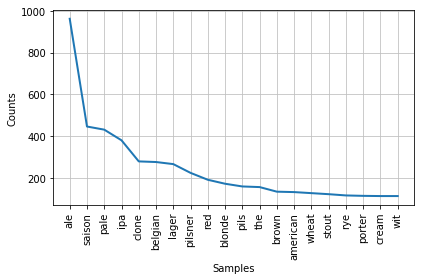

None


In [24]:
# dataframe for just reviews
cluster3_new = cluster3[['Name']]

# create two dataframes and string objects
cluster3_new_str = cluster3_new.to_string()
cluster3_new_str2 = cluster3_new_str.lower()
cluster3_new_str3 = cluster3_new_str2.replace('-','')
cluster3_new_str4 = cluster3_new_str3.split()

# frequency distribution
freq_words = nltk.FreqDist(cluster3_new_str4)
print(freq_words.most_common(50))
print(freq_words)
print(freq_words.plot(20))

[('stout', 1920), ('porter', 1234), ('ale', 1205), ('ipa', 607), ('brown', 493), ('chocolate', 425), ('oatmeal', 415), ('clone', 360), ('milk', 354), ('black', 348), ('red', 337), ('belgian', 308), ('the', 276), ('coffee', 212), ('saison', 200), ('dubbel', 177), ('vanilla', 170), ('american', 169), ('pale', 167), ('recipe', 165), ('irish', 164), ('pumpkin', 160), ('awesome', 155), ('dark', 148), ('amber', 138), ('rye', 134), ('smoked', 122), ('tripel', 117), ('strong', 114), ('imperial', 110), ('winter', 110), ('christmas', 107), ('honey', 107), ('2', 107), ('of', 99), ('wheat', 96), ('robust', 93), ('esb', 87), ('sweet', 86), ('beer', 85), ('bock', 83), ('english', 76), ('and', 73), ('bourbon', 72), ('cherry', 72), ('blonde', 71), ('double', 69), ('cream', 67), ('&', 67), ('old', 66)]
<FreqDist with 18016 samples and 40193 outcomes>


/Users/saultamariz/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


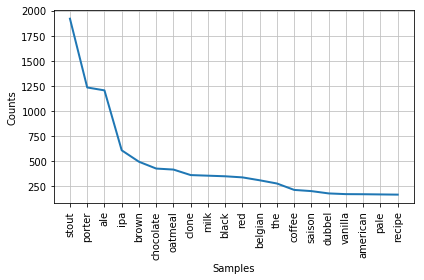

None


In [25]:
# dataframe for just reviews
cluster4_new = cluster4[['Name']]

# create two dataframes and string objects
cluster4_new_str = cluster4_new.to_string()
cluster4_new_str2 = cluster4_new_str.lower()
cluster4_new_str3 = cluster4_new_str2.replace('-','')
cluster4_new_str4 = cluster4_new_str3.split()

# frequency distribution
freq_words = nltk.FreqDist(cluster4_new_str4)
print(freq_words.most_common(50))
print(freq_words)
print(freq_words.plot(20))

[('ale', 1269), ('ipa', 687), ('pale', 492), ('stout', 370), ('clone', 251), ('wheat', 226), ('porter', 223), ('amber', 202), ('recipe', 195), ('brown', 190), ('red', 187), ('extract', 180), ('american', 177), ('awesome', 177), ('saison', 164), ('belgian', 138), ('honey', 133), ('blonde', 130), ('the', 128), ('irish', 99), ('chocolate', 91), ('summer', 89), ('citra', 89), ('beer', 88), ('lager', 84), ('hop', 79), ('black', 77), ('cream', 76), ('1', 69), ('session', 68), ('apa', 67), ('oatmeal', 66), ('dark', 66), ('bitter', 66), ('pumpkin', 65), ('2', 62), ('rye', 59), ('pilsner', 56), ('milk', 56), ('orange', 55), ('smash', 54), ('brew', 53), ('#1', 51), ('hefeweizen', 49), ('hoppy', 49), ('of', 49), ('coffee', 48), ('wit', 47), ('light', 46), ('and', 46)]
<FreqDist with 11502 samples and 24860 outcomes>


/Users/saultamariz/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


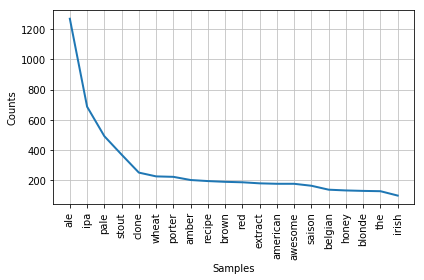

None


In [26]:
# dataframe for just reviews
cluster5_new = cluster5[['Name']]

# create two dataframes and string objects
cluster5_new_str = cluster5_new.to_string()
cluster5_new_str2 = cluster5_new_str.lower()
cluster5_new_str3 = cluster5_new_str2.replace('-','')
cluster5_new_str4 = cluster5_new_str3.split()

# frequency distribution
freq_words = nltk.FreqDist(cluster5_new_str4)
print(freq_words.most_common(50))
print(freq_words)
print(freq_words.plot(20))

[('ipa', 4629), ('ale', 992), ('pale', 635), ('clone', 597), ('red', 392), ('the', 362), ('rye', 320), ('citra', 311), ('black', 299), ('hop', 283), ('american', 241), ('smash', 228), ('recipe', 202), ('double', 192), ('awesome', 192), ('2', 165), ('neipa', 164), ('of', 150), ('imperial', 147), ('stout', 146), ('mosaic', 144), ('dipa', 143), ('session', 142), ('new', 123), ('brown', 118), ('coast', 111), ('white', 108), ('hoppy', 106), ('galaxy', 98), ('belgian', 92), ('two', 89), ('beer', 89), ('a', 87), ('apa', 87), ('summer', 87), ('and', 85), ('amber', 85), ('west', 84), ('cascade', 84), ('hearted', 81), ('zombie', 80), ('1', 79), ('brew', 78), ('wheat', 77), ('centennial', 77), ('dust', 74), ('fresh', 74), ('simcoe', 74), ('ii', 73), ('single', 73)]
<FreqDist with 20328 samples and 45513 outcomes>


/Users/saultamariz/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


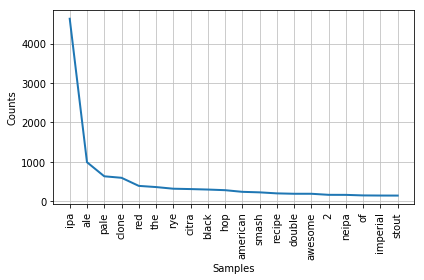

None


In [27]:
# dataframe for just reviews
cluster6_new = cluster6[['Name']]

# create two dataframes and string objects
cluster6_new_str = cluster6_new.to_string()
cluster6_new_str2 = cluster6_new_str.lower()
cluster6_new_str3 = cluster6_new_str2.replace('-','')
cluster6_new_str4 = cluster6_new_str3.split()

# frequency distribution
freq_words = nltk.FreqDist(cluster6_new_str4)
print(freq_words.most_common(50))
print(freq_words)
print(freq_words.plot(20))